In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#info of costumers applying for advance credit card   (provided when filling applicatoin form)
#detect potential fraud

In [4]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [5]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [6]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [7]:
print(X.shape)
print(y.shape)

(690, 15)
(690,)


In [8]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))     #feature_range = (0,1)
X = sc.fit_transform(X)

In [9]:
from minisom import MiniSom

som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

In [10]:
som.distance_map()

array([[ 0.24807844,  0.28201736,  0.44293925,  0.58516618,  0.2864347 ,
         0.23658421,  0.31956212,  0.5304911 ,  0.44427382,  0.23439547],
       [ 0.27022708,  0.52602686,  0.59131907,  0.60933644,  0.46314035,
         0.41736872,  0.52866341,  0.67658029,  0.71397758,  0.51343273],
       [ 0.40818079,  0.41449319,  0.54829849,  0.52928756,  0.5248779 ,
         0.50795706,  0.53205277,  0.69883774,  0.75898852,  0.42452247],
       [ 0.25856869,  0.37372046,  0.44682355,  0.61319195,  0.58979226,
         0.52787399,  0.52977971,  0.52877606,  0.67129946,  0.53517453],
       [ 0.19426156,  0.32505819,  0.41673655,  0.58950286,  0.6877524 ,
         0.73063782,  0.55499796,  0.65415053,  0.71756406,  0.56714964],
       [ 0.33212589,  0.43136625,  0.53255453,  0.88675788,  0.84484896,
         0.76777969,  0.71342022,  0.66925463,  0.81696487,  0.56895086],
       [ 0.4562053 ,  0.57190819,  0.5456989 ,  0.76798967,  0.85023099,
         0.90182268,  0.69204053,  0.62364668

In [11]:
from pylab import bone, pcolor, colorbar, plot, show

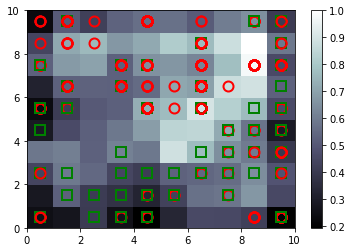

In [12]:
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    
    

In [13]:
l = []
dist_map = som.distance_map()
mappings = som.win_map(X)

for x in range(int(dist_map.shape[0])):
    for y in range(int(dist_map.shape[1])):
        if dist_map[x,y] > .9:
            if len(mappings[(x,y)]) > 0:
                l.append((x, y))
              

In [14]:
#type(dist_map.shape[0])
print(l)

[(6, 5), (8, 7)]


In [15]:
mappings = som.win_map(X)
print(len(mappings[(6,5)]))  

38


In [16]:
l1 = mappings[l[0]]

for i in range(1,len(l)):
    l1 = np.concatenate((l1, mappings[l[i]]))

In [17]:
l2 = []
for x in l:
    l2 += mappings[x]

In [20]:
print(len(l1))
print(len(l2))


58
58


In [28]:
ids = sc.inverse_transform(l1)[:, 0]     # IDs of frauds
print(ids)

[ 15605791.  15596797.  15571415.  15565714.  15655464.  15608688.
  15609070.  15650313.  15575438.  15565996.  15592914.  15581871.
  15611973.  15593178.  15573077.  15646521.  15692430.  15700549.
  15636626.  15645571.  15638272.  15599152.  15683276.  15652289.
  15642001.  15620103.  15642063.  15649101.  15643574.  15600027.
  15588019.  15615670.  15599535.  15678779.  15654760.  15575146.
  15666297.  15611794.  15705918.  15706762.  15672894.  15783883.
  15651868.  15716082.  15675926.  15672637.  15769548.  15752344.
  15736533.  15660528.  15779207.  15611409.  15609987.  15752578.
  15666096.  15609758.  15615296.  15805261.]


In [25]:
dataset['new'] = dataset['CustomerID'].apply(lambda x: x in ids)

In [27]:
print(sum(dataset['new']))
dataset.head(7)
dataset[['CustomerID', 'new']]

58


,CustomerID,new
0,15776156,False
1,15739548,False
2,15662854,False
3,15687688,False
4,15715750,False
5,15571121,False
6,15726466,False
7,15660390,False
8,15663942,False
9,15638610,False


In [34]:
#(Not working (review))

'''
is_fraud = np.zeros(len(dataset))

for x in range(len(dataset)):
    if dataset.iloc[i][0] in ids:
        is_fraud[i] = 1
        
print(sum(is_fraud))        
'''

1.0


In [45]:
is_fraud = np.zeros(len(dataset))

for i in range(len(dataset)):
    if dataset['new'][i] == True:
        is_fraud[i] = 1
print(sum(is_fraud))    
print(is_fraud)

35.0
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

In [51]:
customers = dataset.iloc[:,1:-1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [52]:
from keras.models import Sequential  #initialize
from keras.layers import Dense       #layers

classifier = Sequential()
classifier.add(Dense(units=2, kernel_initializer='uniform', activation='relu', input_dim = 15))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
classifier.fit(customers, is_fraud, batch_size=1, epochs=2)

Epoch 1/2
690/690 [==============================] - 15s 22ms/step - loss: 0.4786 - acc: 0.9449
Epoch 2/2
690/690 [==============================] - 4s 6ms/step - loss: 0.1867 - acc: 0.9493


In [68]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred) , axis=1)

df = pd.DataFrame(y_pred)
df.sort_values(by=1, ascending=False)

None


,0,1
418,15736533.0,0.348078
368,15736399.0,0.348078
81,15719940.0,0.341369
506,15660528.0,0.326035
86,15575605.0,0.325631
577,15666096.0,0.320425
82,15672894.0,0.313471
600,15609758.0,0.313450
672,15615296.0,0.313044
477,15737909.0,0.307948


[ 15570990.  15694237.  15692718.  15789865.  15618703.  15677395.
  15583724.]


Using TensorFlow backend.


Epoch 1/8
690/690 [==============================] - 15s 22ms/step - loss: 0.4163 - acc: 0.9899
Epoch 2/8
690/690 [==============================] - 4s 6ms/step - loss: 0.0951 - acc: 0.9899
Epoch 3/8
690/690 [==============================] - 4s 6ms/step - loss: 0.0491 - acc: 0.9899
Epoch 4/8
690/690 [==============================] - 4s 6ms/step - loss: 0.0373 - acc: 0.9899
Epoch 5/8
690/690 [==============================] - 4s 6ms/step - loss: 0.0315 - acc: 0.9899
Epoch 6/8
690/690 [==============================] - 4s 6ms/step - loss: 0.0276 - acc: 0.9899
Epoch 7/8
690/690 [==============================] - 4s 6ms/step - loss: 0.0251 - acc: 0.9899
Epoch 8/8
690/690 [==============================] - 4s 6ms/step - loss: 0.0234 - acc: 0.9899


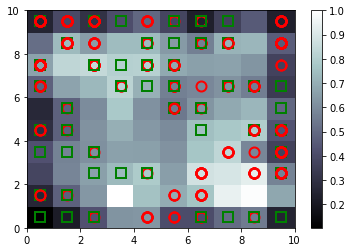

In [1]:
import numpy as np
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline



dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)




#mappings = som.win_map(X)



l = []
dist_map = som.distance_map()
mappings = som.win_map(X)

for x in range(int(dist_map.shape[0])):
    for y in range(int(dist_map.shape[1])):
        if dist_map[x,y] > .9:
            if len(mappings[(x,y)]) > 0:
                l.append((x, y))


frauds = mappings[l[0]]

for i in range(1,len(l)):
    frauds = np.concatenate((frauds, mappings[l[i]]))
                
                                

frauds = sc.inverse_transform(frauds)
print(frauds[:,0])



customers = dataset.iloc[:,1:].values

is_fraud = np.zeros(len(dataset))


for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1




from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)



#ANN
from keras.models import Sequential  #initialize
from keras.layers import Dense       #layers

classifier = Sequential()
classifier.add(Dense(units=2, kernel_initializer='uniform', activation='relu', input_dim = 15))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(customers, is_fraud, batch_size=1, epochs=8)
        
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred) , axis=1)
y_pred = y_pred[y_pred[:,1].argsort()]

#print(y_pred)

In [79]:
pd.DataFrame(y_pred).sort_values(by=1, ascending=False).head()

,0,1
689,15802869.0,0.299171
688,15654625.0,0.299171
687,15641007.0,0.299171
686,15750545.0,0.299171
685,15641733.0,0.284391


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(customers, is_fraud, test_size=0.3, random_state=101)

print(customers[:2])
print('\n')


from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix
print('---------RANDOM_FOREST_CLASSIFIER------------')


print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')



from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)



print('------------DTREE_CLASSIFIER---------------')


print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')



from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)



print('---------LOGISTIC_REGRESSION_MODEL------------')


print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')



print(X_test)

[[ 0.68873723 -0.80105183  1.34711063  0.54294996 -0.91628228 -0.34796495
  -0.19090583 -1.04750391 -0.86419641 -0.49388662  1.08790822  0.23782765
  -0.48835847  0.03738039 -0.89530251]
 [-1.45193254 -0.75124044  0.45054795  0.54294996  0.17049859 -0.34796495
  -0.61553587 -1.04750391 -0.86419641 -0.49388662 -0.91919518  0.23782765
  -0.13959116 -0.19541334 -0.89530251]]


---------RANDOM_FOREST_CLASSIFIER------------
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.96       193
        1.0       0.00      0.00      0.00        14

avg / total       0.87      0.93      0.90       207



[[193   0]
 [ 14   0]]


------------DTREE_CLASSIFIER---------------
             precision    recall  f1-score   support

        0.0       0.95      0.97      0.96       193
        1.0       0.44      0.29      0.35        14

avg / total       0.92      0.93      0.92       207



[[188   5]
 [ 10   4]]




C:\Users\Raman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


---------LOGISTIC_REGRESSION_MODEL------------
             precision    recall  f1-score   support

        0.0       0.93      0.99      0.96       193
        1.0       0.00      0.00      0.00        14

avg / total       0.87      0.92      0.89       207



[[191   2]
 [ 14   0]]


[[ 0.68873723  1.35941171 -0.45405566 ...,  1.31360593  0.28669249
   1.11694091]
 [ 0.68873723  0.62068345 -0.60482292 ...,  0.67419921 -0.19502919
  -0.89530251]
 [ 0.68873723  0.78953563 -0.8561017  ..., -0.31397482 -0.19541334
  -0.89530251]
 ..., 
 [ 0.68873723  0.6628965  -0.61286384 ...,  1.25547805 -0.19541334
  -0.89530251]
 [-1.45193254 -0.32911001 -0.54652625 ..., -0.0233354  -0.18580964
  -0.89530251]
 [-1.45193254  1.07742858 -0.95661321 ..., -1.06963731 -0.19541334
   1.11694091]]
